In [6]:
import os 
import torch 
import fnmatch
from torch import nn
from PIL import Image
from torchvision import transforms 
from tqdm.auto import tqdm 
from torchvision.utils import make_grid
from torch.utils.data import Dataset, DataLoader 
import matplotlib.pyplot as plt 

In [7]:
DATA_PATHS = {
    "dataset": "./dataset/"
}

In [8]:
class PetrolPumpDataset(Dataset): 
    def __init__(self, img_dir, transform=None, extensions=['*.jpg', '*.jpeg', '*.png']):
        self.extensions = extensions 
        self.img_dir = img_dir
        self.image_paths = [f"{img_dir}/{img}" for img in os.listdir(img_dir) if any(fnmatch.fnmatch(img, ext) for ext in extensions)]
        self.transform = transform 
        
    def __len__(self): 
        return len(self.image_paths)
    
    def __getitem__(self, idx): 
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform: 
            image = self.transform(image)
            
        return image

In [9]:
dataset = PetrolPumpDataset(DATA_PATHS["dataset"], transform=transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
]))

In [10]:
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
img = next(iter(dataloader))
img[0].shape

torch.Size([3, 256, 256])

In [11]:
def show_tensor_images(image_tensor, num_images=1):
    image_tensor = image_tensor.detach().cpu()
    image_tensor = image_tensor.permute(1, 2, 0)

    # Handling normalization 
    image_tensor = torch.clamp((image_tensor + 1) / 2, min=-1, max=1)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(image_tensor)
    plt.axis('off')
    plt.show()


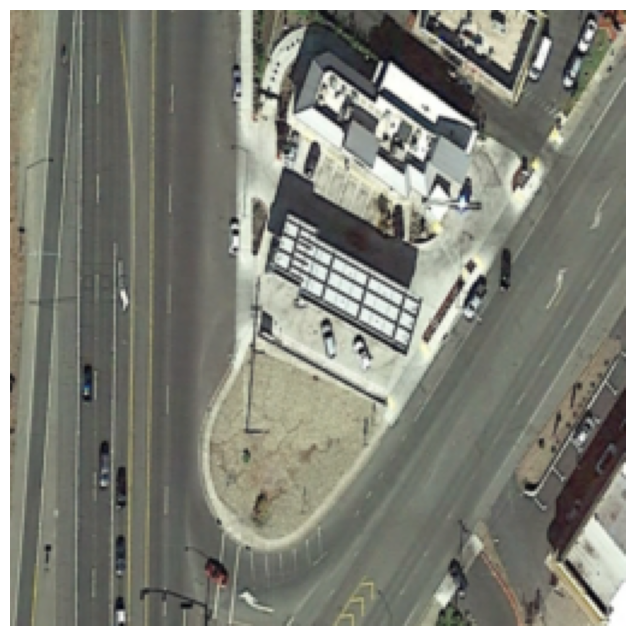

In [12]:
show_tensor_images(img[10])